In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.000000,0.871895,0.143370,0.000000,0.000000,0.938635,0.480550,18
1,0.000443,0.665213,0.165469,0.220794,0.060606,0.945497,0.772254,40
2,0.000886,0.819225,0.100399,0.000000,0.000000,0.860134,0.557937,18
3,0.001329,-0.220496,0.077330,0.129641,0.000000,0.994121,0.667010,10
4,0.001772,0.407500,0.182346,0.103005,0.010101,0.860134,0.344968,5
5,0.002215,0.695033,0.164833,0.119234,0.000000,0.870074,0.387616,3
6,0.002658,-1.312439,0.029155,0.000000,0.000000,0.931638,0.814199,29
7,0.003101,-0.230401,0.056125,0.112309,0.000000,0.870074,0.165778,2
8,0.003545,0.200020,0.110227,0.064135,0.020202,0.940937,0.498323,20
9,0.003988,-0.787443,0.068629,0.000000,0.000000,0.885153,0.293394,3


In [3]:
X = dataset.iloc[:, [*range(0,6),7]].values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 70
second_hidden_layer_size = 15
third_hidden_layer_size = 40

output_layer_size = 1


epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                1065      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 2,306
Trainable params: 2,306
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/100
1819/1819 [==============================] - 1s 515us/step - loss: 1.4099 - mean_absolute_error: 0.3363 - mean_squared_error: 1.4099 - val_loss: 0.0227 - val_mean_absolute_error: 0.1119 - val_mean_squared_error: 0.0227
Epoch 2/100
1819/1819 [==============================] - 0s 160us/step - loss: 0.0220 - mean_absolute_error: 0.1150 - mean_squared_error: 0.0220 - val_loss: 0.0167 - val_mean_absolute_error: 0.1022 - val_mean_squared_error: 0.0167
Epoch 3/100
1819/1819 [==============================] - 0s 164us/step - loss: 0.0225 - mean_absolute_error: 0.1123 - mean_squared_error: 0.0225 - val_loss: 0.0156 - val_mean_absolute_error: 0.0990 - val_mean_squared_error: 0.0156
Epoch 4/100
1819/1819 [==============================] - 0s 166us/step - loss: 0.0176 - mean_absolute_error: 0.1034 - mean_squared_error: 0.0176 - val_loss: 0.0160 - val_mean_absolute_error: 0.0997 - val_mean_squared_error: 0.0160
Epoch 5/100
1819/1819 [======

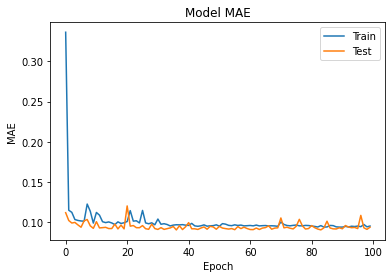

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

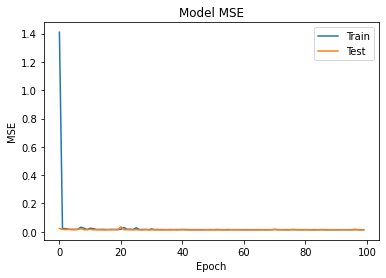

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

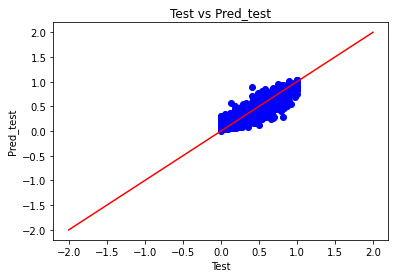

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

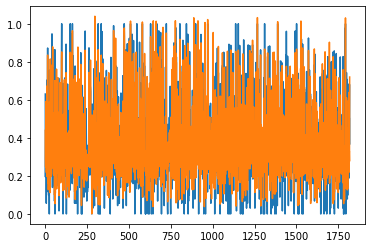

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

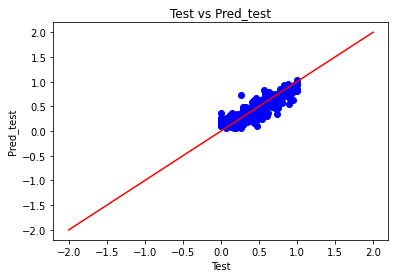

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

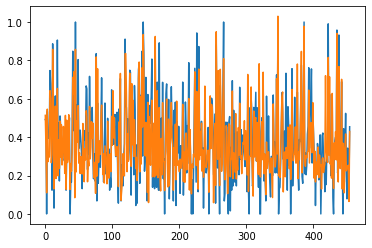

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.1208670519420831
0.11770446515546162


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9981108903884888, p = 0.033920858055353165
Test k = 0.994056761264801, p = 0.07281985878944397


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9978228807449341, p_s = 0.003240330843254924
k_n = 12.781971507673163, p_n = 0.0016766026690217956


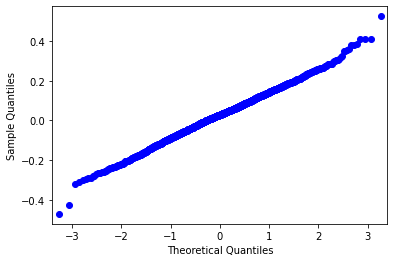

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

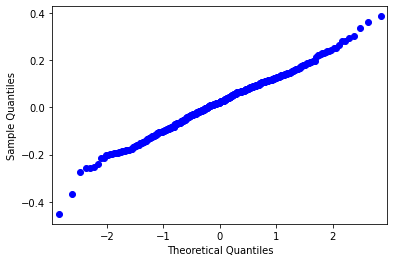

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

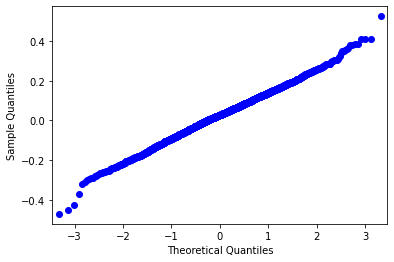

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

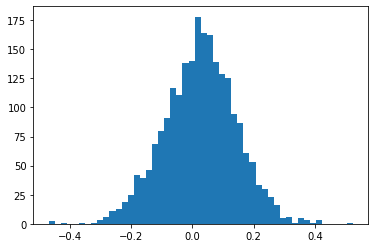

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')